In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#MSP, m/s and 16 point
df_MSP = pd.read_csv('MSP.csv')
column_names_MSP = df_MSP.columns.tolist()
df_MSP.rename(columns={'Wind speed(m/s)':'Wind speed', 'Wind direction' : 'Wind direction 16point'}, inplace=True)
filtered_MSP = df_MSP[['time', 'Wind direction 16point', 'Wind speed']]
filtered_MSP.loc[:, 'time'] = pd.to_datetime(filtered_MSP['time'], errors='coerce', dayfirst=True)

#Meteostat, km/h and degrees
df_meteostat = pd.read_csv('Meteostat.csv')
column_names_meteostat = df_meteostat.columns.tolist()
df_meteostat.rename(columns={'wspd':'Wind speed', 'wdir': 'Wind direction'}, inplace=True)
filtered_meteostat = df_meteostat[['time', 'Wind direction', 'Wind speed']]
filtered_meteostat.loc[:, 'time'] = pd.to_datetime(filtered_meteostat['time'], errors='coerce', dayfirst=True)

#Openmeteo, km/h and degrees
df_openmeteo = pd.read_csv('Open_meteo.csv')
column_names_openmeteo = df_openmeteo.columns.tolist()
df_openmeteo.rename(columns={'wind_speed_10m (km/h)':'Wind speed', 'wind_direction_10m': 'Wind direction'}, inplace=True)
filtered_openmeteo = df_openmeteo[['time', 'Wind direction', 'Wind speed']]
filtered_openmeteo.loc[:, 'time'] = pd.to_datetime(filtered_openmeteo['time'], errors='coerce', dayfirst=True)

#Visual crossing, km/h and degrees
df_visualcrossing = pd.read_csv('Visual_crossing.csv')
column_names_visualcrossing = df_visualcrossing.columns.tolist()
df_visualcrossing.rename(columns={'datetime': 'time', 'windspeed':'Wind speed', 'winddir': 'Wind direction'}, inplace=True)
filtered_visualcrossing = df_visualcrossing[['time', 'Wind direction', 'Wind speed']]
filtered_visualcrossing.loc[:, 'time'] = pd.to_datetime(filtered_visualcrossing['time'], errors='coerce', dayfirst=True)

#WeatherAPI, km/h and degrees
df_weatherAPI = pd.read_csv('WeatherAPI.csv')
column_names_weatherAPI = df_weatherAPI.columns.tolist()
df_weatherAPI.rename(columns={'wind_kph': 'Wind speed', 'wind_degree': 'Wind direction'}, inplace=True)
filtered_weatherAPI = df_weatherAPI[['time', 'Wind direction', 'Wind speed']]
filtered_weatherAPI.loc[:, 'time'] = pd.to_datetime(filtered_weatherAPI['time'], errors='coerce', dayfirst=True)

#world_weather_online, km/h and degrees/16 point
df_world_weather_online = pd.read_csv('World_weather_online.csv')
column_names_world_weather_online = df_world_weather_online.columns.tolist()
df_world_weather_online.rename(columns={'Timestamp': 'time','Wind Speed (km/h)': 'Wind speed', 'winddirDegree': 'Wind direction'}, inplace=True)
filtered_world_weather_online = df_world_weather_online[['time', 'Wind direction', 'Wind speed']]
filtered_world_weather_online.loc[:, 'time'] = pd.to_datetime(filtered_world_weather_online['time'], errors='coerce', dayfirst=True)





C:\Users\jelle\AppData\Local\Temp\ipykernel_39632\2800472336.py:20: UserWarning: Parsing dates in %Y-%m-%dT%H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  filtered_openmeteo.loc[:, 'time'] = pd.to_datetime(filtered_openmeteo['time'], errors='coerce', dayfirst=True)
C:\Users\jelle\AppData\Local\Temp\ipykernel_39632\2800472336.py:27: UserWarning: Parsing dates in %Y-%m-%dT%H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  filtered_visualcrossing.loc[:, 'time'] = pd.to_datetime(filtered_visualcrossing['time'], errors='coerce', dayfirst=True)


In [4]:
def wind_direction_to_16point(degree):
    directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    idx = int((degree + 11.25) // 22.5) % 16
    return directions[idx]


filtered_meteostat.loc[:, 'Wind direction 16point'] = filtered_meteostat['Wind direction'].apply(lambda x: wind_direction_to_16point(x) if pd.notnull(x) else x)
filtered_openmeteo.loc[:, 'Wind direction 16point'] = filtered_openmeteo['Wind direction'].apply(lambda x: wind_direction_to_16point(x) if pd.notnull(x) else x)
filtered_visualcrossing.loc[:, 'Wind direction 16point'] = filtered_visualcrossing['Wind direction'].apply(lambda x: wind_direction_to_16point(x) if pd.notnull(x) else x)
filtered_weatherAPI.loc[:, 'Wind direction 16point'] = filtered_weatherAPI['Wind direction'].apply(lambda x: wind_direction_to_16point(x) if pd.notnull(x) else x)
filtered_world_weather_online.loc[:, 'Wind direction 16point'] = filtered_world_weather_online['Wind direction'].apply(lambda x: wind_direction_to_16point(x) if pd.notnull(x) else x)


C:\Users\jelle\AppData\Local\Temp\ipykernel_39632\1854546173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_meteostat.loc[:, 'Wind direction 16point'] = filtered_meteostat['Wind direction'].apply(lambda x: wind_direction_to_16point(x) if pd.notnull(x) else x)
C:\Users\jelle\AppData\Local\Temp\ipykernel_39632\1854546173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_openmeteo.loc[:, 'Wind direction 16point'] = filtered_openmeteo['Wind direction'].apply(lambda x: wind_direction_to_

In [5]:
merged_data = filtered_MSP[['time', 'Wind direction 16point']].rename(columns={'Wind direction 16point': 'MSP Direction'})

sources = {
    "Meteostat": filtered_meteostat,
    "OpenMeteo": filtered_openmeteo,
    "VisualCrossing": filtered_visualcrossing,
    "WeatherAPI": filtered_weatherAPI,
    "WorldWeatherOnline": filtered_world_weather_online
}

for name, df in sources.items():
    merged_data = merged_data.merge(
        df[['time', 'Wind direction 16point']].rename(columns={'Wind direction 16point': f'{name} Direction'}),
        on='time',
        how='inner'
    )


               Source  Exact Match (%)  Near Match (%)
0           Meteostat         5.208333        9.375000
1           OpenMeteo         7.291667        8.333333
2      VisualCrossing        11.458333       14.583333
3          WeatherAPI         8.333333       11.458333
4  WorldWeatherOnline         2.083333        4.166667


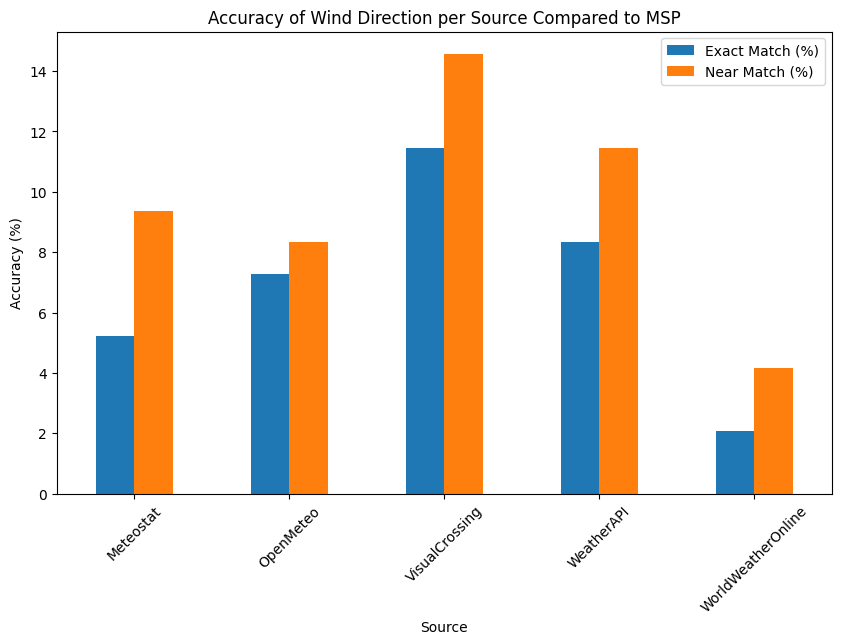

In [6]:
def evaluate_accuracy(df, msp_col, source_col):
    exact_matches = df[msp_col] == df[source_col]
    adjacent_matches = df.apply(
        lambda row: row[source_col] in {
            'NNE' if row[msp_col] == 'N' else 'NNW',
            'ENE' if row[msp_col] == 'NE' else 'NNE',
            'ESE' if row[msp_col] == 'SE' else 'ENE',
            'SSW' if row[msp_col] == 'S' else 'SSE',
            'WSW' if row[msp_col] == 'SW' else 'SSW',
            'WNW' if row[msp_col] == 'NW' else 'WSW'
        } if row[msp_col] in ['N', 'NE', 'SE', 'S', 'SW', 'NW'] else False,
        axis=1
    )
    accuracy_rate = exact_matches.mean() * 100
    near_match_rate = (exact_matches | adjacent_matches).mean() * 100
    return accuracy_rate, near_match_rate

results = []

for name in sources.keys():
    exact_acc, near_acc = evaluate_accuracy(merged_data, 'MSP Direction', f'{name} Direction')
    results.append({"Source": name, "Exact Match (%)": exact_acc, "Near Match (%)": near_acc})


results_df = pd.DataFrame(results)
print(results_df)

results_df.set_index('Source')[['Exact Match (%)', 'Near Match (%)']].plot(kind='bar', figsize=(10, 6))
plt.title("Accuracy of Wind Direction per Source Compared to MSP")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.show()



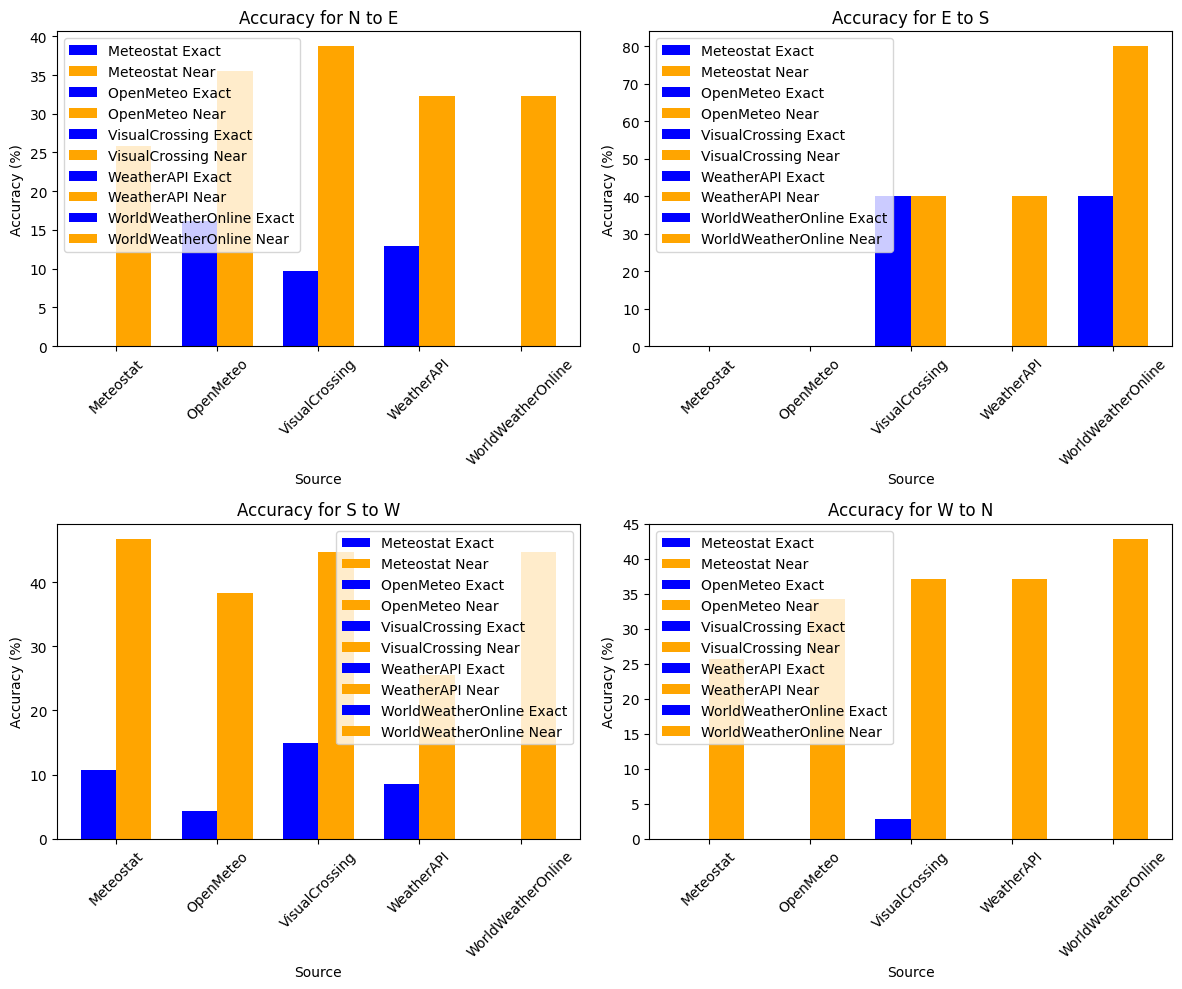

In [7]:
quadrants = {
    "N to E": ['N', 'NNE', 'NE', 'ENE', 'E'],
    "E to S": ['E', 'ESE', 'SE', 'SSE', 'S'],
    "S to W": ['S', 'SSW', 'SW', 'WSW', 'W'],
    "W to N": ['W', 'WNW', 'NW', 'NNW', 'N']
}

def evaluate_quadrant_accuracy(df, msp_col, source_col, quadrant_directions):
    subset = df[df[msp_col].isin(quadrant_directions)]
    exact_matches = subset[msp_col] == subset[source_col]
    adjacent_matches = subset.apply(
        lambda row: row[source_col] in {
            'NNE' if row[msp_col] == 'N' else 'NNW',
            'ENE' if row[msp_col] == 'NE' else 'NNE',
            'ESE' if row[msp_col] == 'SE' else 'ENE',
            'SSW' if row[msp_col] == 'S' else 'SSE',
            'WSW' if row[msp_col] == 'SW' else 'SSW',
            'WNW' if row[msp_col] == 'NW' else 'WSW'
        } if row[msp_col] in quadrant_directions else False,
        axis=1
    )

    accuracy_rate = (exact_matches).mean()*100
    near_match_rate = ((exact_matches | adjacent_matches)).mean()*100
    return accuracy_rate, near_match_rate


results = []

for name, df in sources.items():
    merged_data = filtered_MSP[['time', 'Wind direction 16point']].rename(columns={'Wind direction 16point': 'MSP Direction'})
    merged_data = merged_data.merge(
        df[['time', 'Wind direction 16point']].rename(columns={'Wind direction 16point': f'{name} Direction'}),
        on='time',
        how='inner'
    )
    for quadrant, directions in quadrants.items():
        exact_acc, near_acc = evaluate_quadrant_accuracy(merged_data, 'MSP Direction', f'{name} Direction', directions)
        results.append({
            "Quadrant": quadrant,
            "Source": name,
            "Exact Match (%)": exact_acc,
            "Near Match (%)": near_acc
        })


results_df = pd.DataFrame(results)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, (quadrant, directions) in enumerate(quadrants.items()):
    ax = axes[i // 2, i % 2]
    quadrant_results = results_df[results_df["Quadrant"] == quadrant]
    bar_width = 0.35
    index = range(len(sources))
    for j, source in enumerate(sources.keys()):
        exact_data = quadrant_results[quadrant_results["Source"] == source]["Exact Match (%)"]
        near_data = quadrant_results[quadrant_results["Source"] == source]["Near Match (%)"]
        
        ax.bar(index[j] - bar_width / 2, exact_data, bar_width, label=f'{source} Exact', color='blue')
        ax.bar(index[j] + bar_width / 2, near_data, bar_width, label=f'{source} Near', color='orange')

   
    ax.set_title(f"Accuracy for {quadrant}")
    ax.set_xlabel("Source")
    ax.set_ylabel("Accuracy (%)")
    ax.set_xticks(index)
    ax.set_xticklabels(sources.keys(), rotation=45)
    ax.legend()

plt.tight_layout()
plt.show()


   Quadrant              Source  Exact Match (%)  Near Match (%)
0    N to E           Meteostat         0.000000       25.806452
1    E to S           Meteostat         0.000000        0.000000
2    S to W           Meteostat        10.638298       46.808511
3    W to N           Meteostat         0.000000       25.714286
4    N to E           OpenMeteo        16.129032       35.483871
5    E to S           OpenMeteo         0.000000        0.000000
6    S to W           OpenMeteo         4.255319       38.297872
7    W to N           OpenMeteo         0.000000       34.285714
8    N to E      VisualCrossing         9.677419       38.709677
9    E to S      VisualCrossing        40.000000       40.000000
10   S to W      VisualCrossing        14.893617       44.680851
11   W to N      VisualCrossing         2.857143       37.142857
12   N to E          WeatherAPI        12.903226       32.258065
13   E to S          WeatherAPI         0.000000       40.000000
14   S to W          Weat

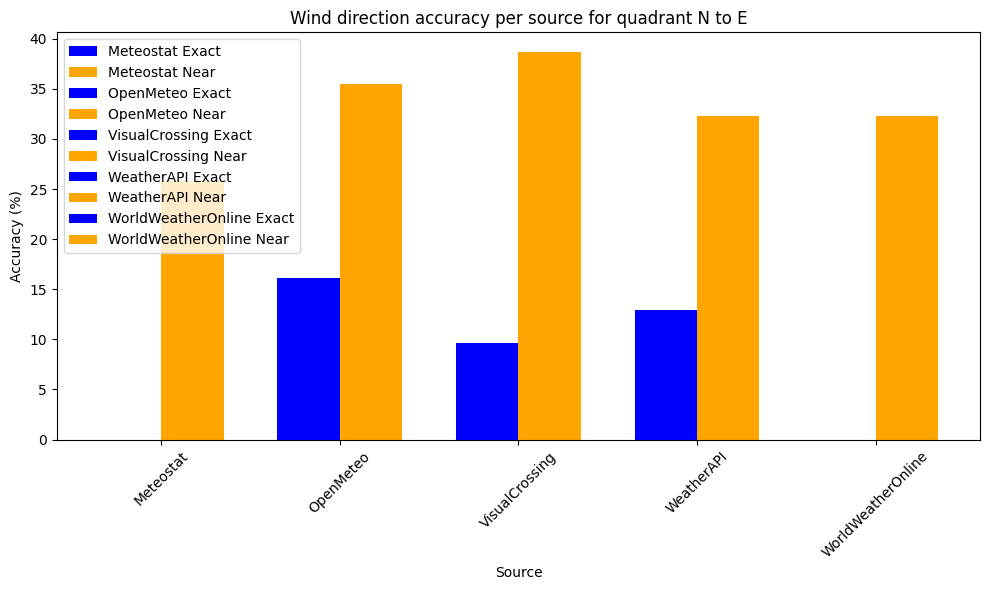

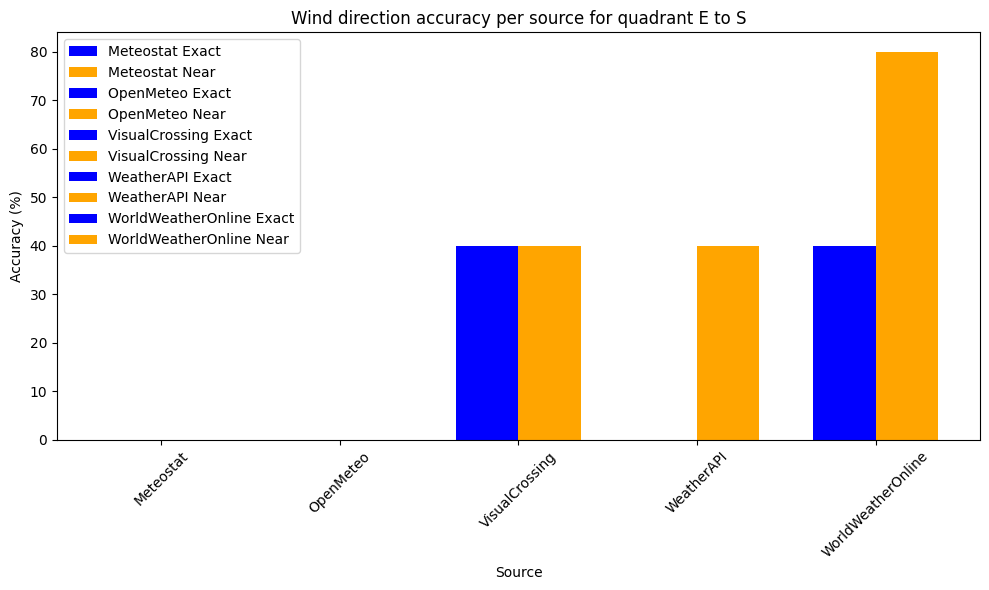

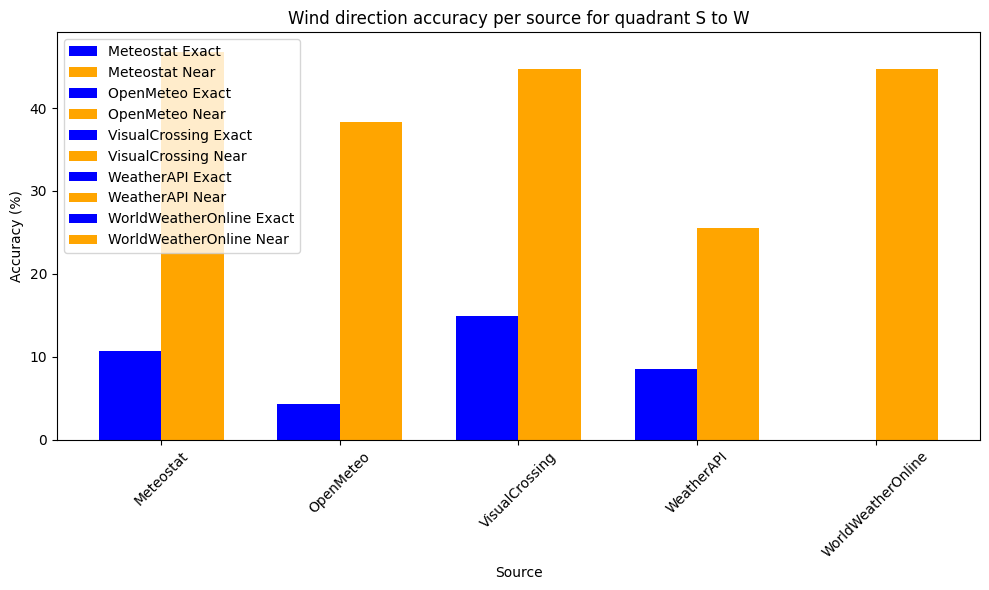

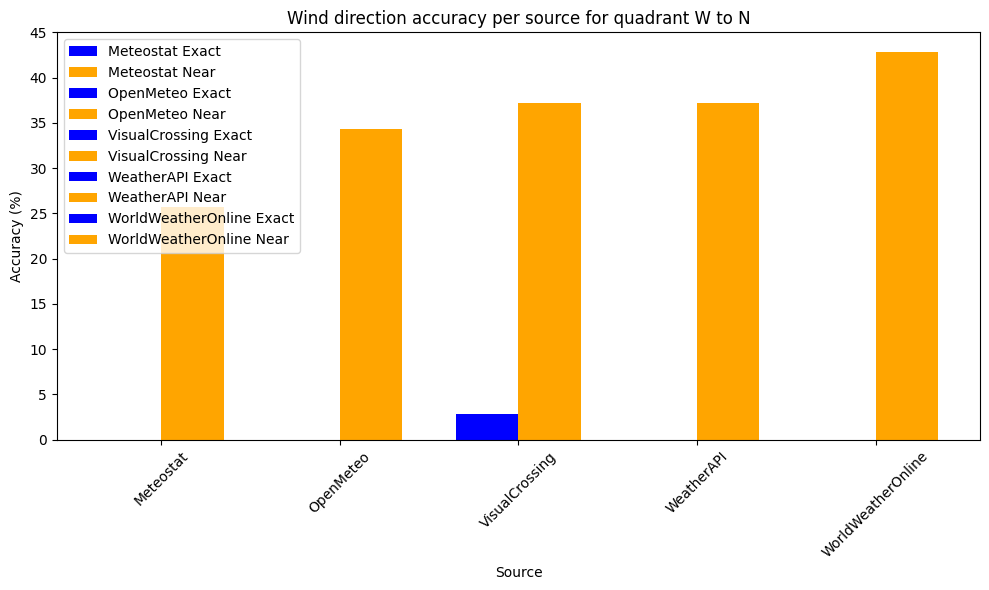

In [8]:
quadrants = {
    "N to E": ['N', 'NNE', 'NE', 'ENE', 'E'],
    "E to S": ['E', 'ESE', 'SE', 'SSE', 'S'],
    "S to W": ['S', 'SSW', 'SW', 'WSW', 'W'],
    "W to N": ['W', 'WNW', 'NW', 'NNW', 'N']
}

def evaluate_quadrant_accuracy(df, msp_col, source_col, quadrant_directions):
    subset = df[df[msp_col].isin(quadrant_directions)]
    exact_matches = subset[msp_col] == subset[source_col]
    adjacent_matches = subset.apply(
        lambda row: row[source_col] in {
            'NNE' if row[msp_col] == 'N' else 'NNW',
            'ENE' if row[msp_col] == 'NE' else 'NNE',
            'ESE' if row[msp_col] == 'SE' else 'ENE',
            'SSW' if row[msp_col] == 'S' else 'SSE',
            'WSW' if row[msp_col] == 'SW' else 'SSW',
            'WNW' if row[msp_col] == 'NW' else 'WSW'
        } if row[msp_col] in quadrant_directions else False,
        axis=1
    )

    accuracy_rate = (exact_matches).mean()*100
    near_match_rate = ((exact_matches | adjacent_matches)).mean()*100
    return accuracy_rate, near_match_rate


results = []

for name, df in sources.items():
    merged_data = filtered_MSP[['time', 'Wind direction 16point']].rename(columns={'Wind direction 16point': 'MSP Direction'})
    merged_data = merged_data.merge(
        df[['time', 'Wind direction 16point']].rename(columns={'Wind direction 16point': f'{name} Direction'}),
        on='time',
        how='inner'
    )
    for quadrant, directions in quadrants.items():
        exact_acc, near_acc = evaluate_quadrant_accuracy(merged_data, 'MSP Direction', f'{name} Direction', directions)
        results.append({
            "Quadrant": quadrant,
            "Source": name,
            "Exact Match (%)": exact_acc,
            "Near Match (%)": near_acc
        })


results_df = pd.DataFrame(results)
print(results_df)




for quadrant, directions in quadrants.items():
    fig, ax = plt.subplots(figsize=(10, 6)) 
   
    quadrant_results = results_df[results_df["Quadrant"] == quadrant]
    bar_width = 0.35
    index = range(len(sources))
    
    for j, source in enumerate(sources.keys()):
        exact_data = quadrant_results[quadrant_results["Source"] == source]["Exact Match (%)"]
        near_data = quadrant_results[quadrant_results["Source"] == source]["Near Match (%)"]
        
        ax.bar(index[j] - bar_width / 2, exact_data, bar_width, label=f'{source} Exact', color='blue')
        ax.bar(index[j] + bar_width / 2, near_data, bar_width, label=f'{source} Near', color='orange')

    ax.set_title(f"Wind direction accuracy per source for quadrant {quadrant}")
    ax.set_xlabel("Source")
    ax.set_ylabel("Accuracy (%)")
    ax.set_xticks(index)
    ax.set_xticklabels(sources.keys(), rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()


               Source  Accuracy (%)
0           Meteostat     10.416667
1           OpenMeteo      3.125000
2      VisualCrossing      1.041667
3          WeatherAPI      5.208333
4  WorldWeatherOnline      4.166667


C:\Users\jelle\AppData\Local\Temp\ipykernel_39632\2526679408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_MSP["Wind speed (m/s)"] = filtered_MSP["Wind speed"]*0.277778 #Convert to m/s


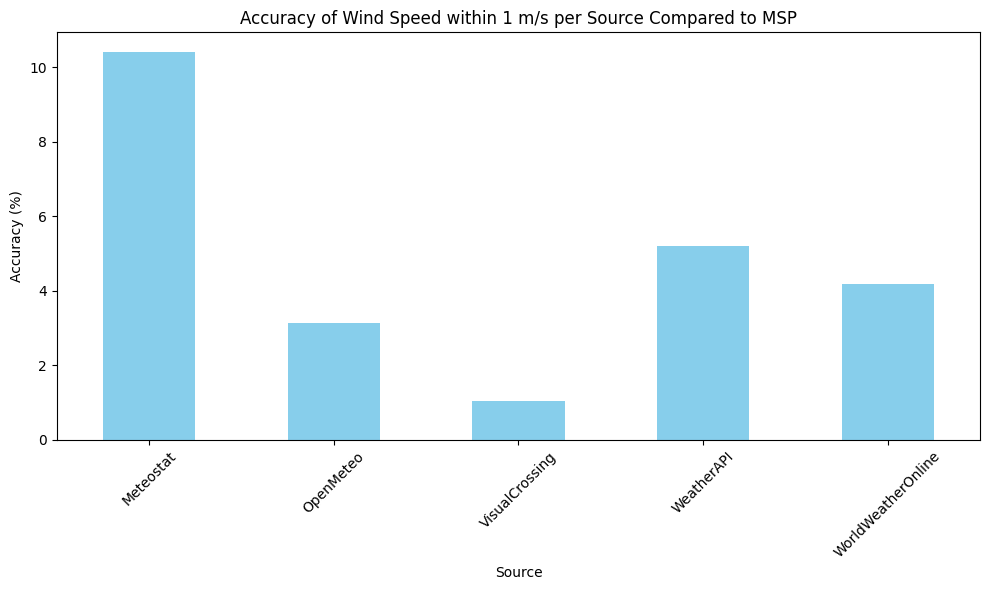

In [9]:
filtered_MSP["Wind speed (m/s)"] = filtered_MSP["Wind speed"]*0.277778 #Convert to m/s


sources_speed = {
    "Meteostat": filtered_meteostat,
    "OpenMeteo": filtered_openmeteo,
    "VisualCrossing": filtered_visualcrossing,
    "WeatherAPI": filtered_weatherAPI,
    "WorldWeatherOnline": filtered_world_weather_online,
}

merged_speed_data = filtered_MSP[["time", "Wind speed (m/s)"]].rename(columns={"Wind speed (m/s)": "MSP Wind Speed"})

for name, df in sources_speed.items():
    merged_speed_data = merged_speed_data.merge(
        df[["time", "Wind speed"]].rename(columns={"Wind speed": f"{name} Wind Speed"}),
        on="time",
        how="inner",
    )

def evaluate_speed_accuracy(df, msp_col, source_col, margin=1.0):
    exact_matches = abs(df[msp_col] - df[source_col]) <= margin
    accuracy_rate = exact_matches.mean()*100
    return accuracy_rate

speed_results = []

for name in sources_speed.keys():
    accuracy = evaluate_speed_accuracy(merged_speed_data, "MSP Wind Speed", f"{name} Wind Speed")
    speed_results.append({"Source": name, "Accuracy (%)": accuracy})
speed_results_df = pd.DataFrame(speed_results)
print(speed_results_df)


speed_results_df.set_index("Source")["Accuracy (%)"].plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Accuracy of Wind Speed within 1 m/s per Source Compared to MSP")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
print(speed_results_df)

               Source  Accuracy (%)
0           Meteostat     10.416667
1           OpenMeteo      3.125000
2      VisualCrossing      1.041667
3          WeatherAPI      5.208333
4  WorldWeatherOnline      4.166667


C:\Users\jelle\AppData\Local\Temp\ipykernel_39632\2369566579.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(quadrant_results["Source"], rotation=45)
C:\Users\jelle\AppData\Local\Temp\ipykernel_39632\2369566579.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(quadrant_results["Source"], rotation=45)
C:\Users\jelle\AppData\Local\Temp\ipykernel_39632\2369566579.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(quadrant_results["Source"], rotation=45)
C:\Users\jelle\AppData\Local\Temp\ipykernel_39632\2369566579.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(quadrant_

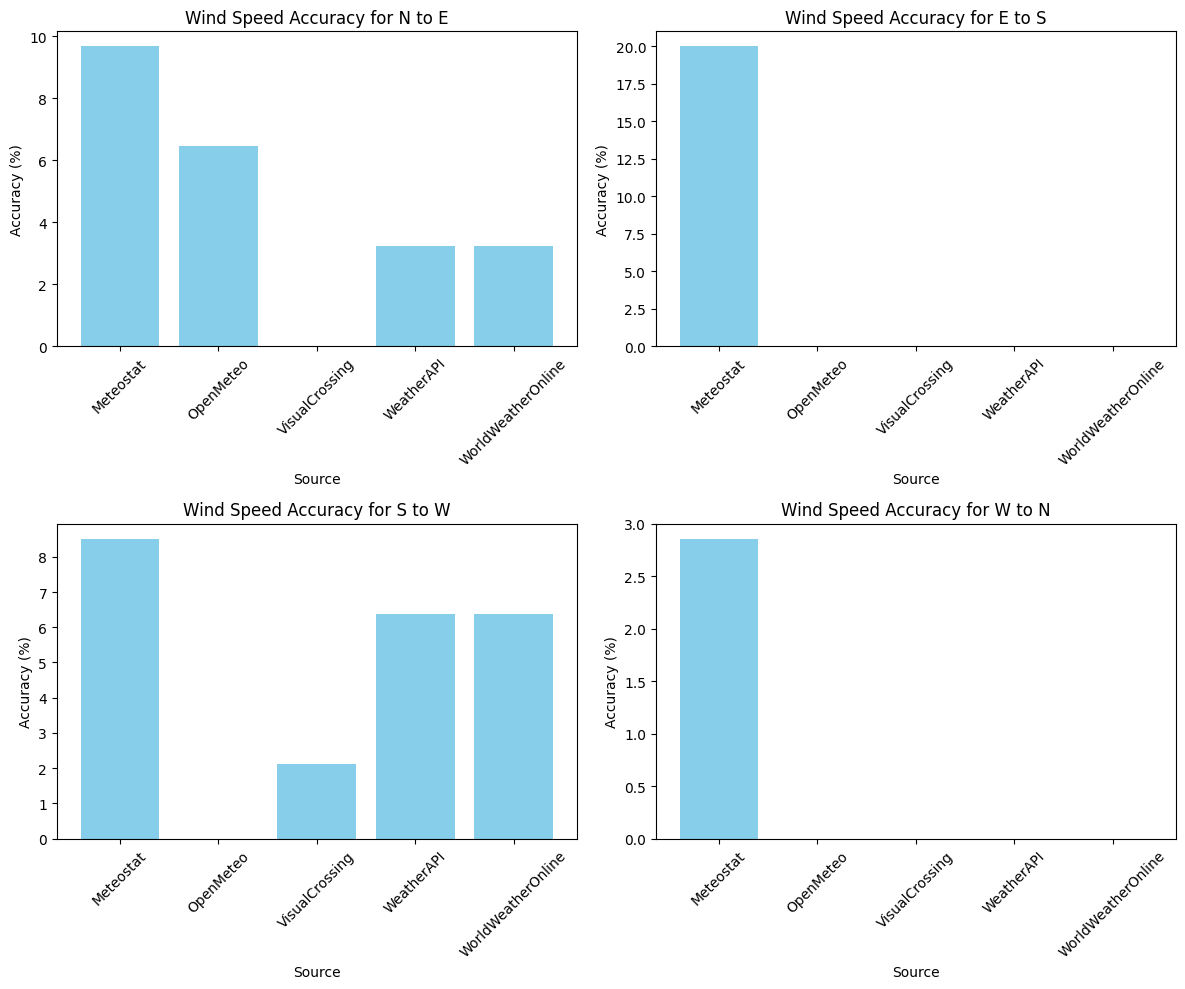

In [11]:
quadrants = {
    "N to E": ['N', 'NNE', 'NE', 'ENE', 'E'],
    "E to S": ['E', 'ESE', 'SE', 'SSE', 'S'],
    "S to W": ['S', 'SSW', 'SW', 'WSW', 'W'],
    "W to N": ['W', 'WNW', 'NW', 'NNW', 'N']
}


def evaluate_quadrant_speed_accuracy(df, msp_col, source_col, quadrant_directions, margin=1.0):
    subset = df[df["MSP Direction"].isin(quadrant_directions)]
    exact_matches = abs(subset[msp_col] - subset[source_col]) <= margin
    accuracy_rate = exact_matches.mean()*100
    return accuracy_rate

quadrant_speed_results = []

for name, df in sources_speed.items():
    merged_data = filtered_MSP[["time", "Wind speed (m/s)", "Wind direction 16point"]].rename(
        columns={
            "Wind speed (m/s)": "MSP Wind Speed",
            "Wind direction 16point": "MSP Direction"
        }
    )
    merged_data = merged_data.merge(
        df[["time", "Wind speed"]].rename(columns={"Wind speed": f"{name} Wind Speed"}),
        on="time",
        how="inner"
    )
    for quadrant, directions in quadrants.items():
        accuracy = evaluate_quadrant_speed_accuracy(
            merged_data, "MSP Wind Speed", f"{name} Wind Speed", directions
        )
        quadrant_speed_results.append({
            "Quadrant": quadrant,
            "Source": name,
            "Accuracy (%)": accuracy
        })


quadrant_speed_results_df = pd.DataFrame(quadrant_speed_results)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, (quadrant, directions) in enumerate(quadrants.items()):
    ax = axes[i // 2, i % 2]
    
    quadrant_results = quadrant_speed_results_df[quadrant_speed_results_df["Quadrant"] == quadrant]
    

    ax.bar(
        quadrant_results["Source"], 
        quadrant_results["Accuracy (%)"], 
        color="skyblue"
    )
    ax.set_title(f"Wind Speed Accuracy for {quadrant}")
    ax.set_ylabel("Accuracy (%)")
    ax.set_xlabel("Source")
    ax.set_xticklabels(quadrant_results["Source"], rotation=45)

plt.tight_layout()
plt.show()


C:\Users\jelle\AppData\Local\Temp\ipykernel_39632\1279351615.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(quadrant_results["Source"], rotation=45)


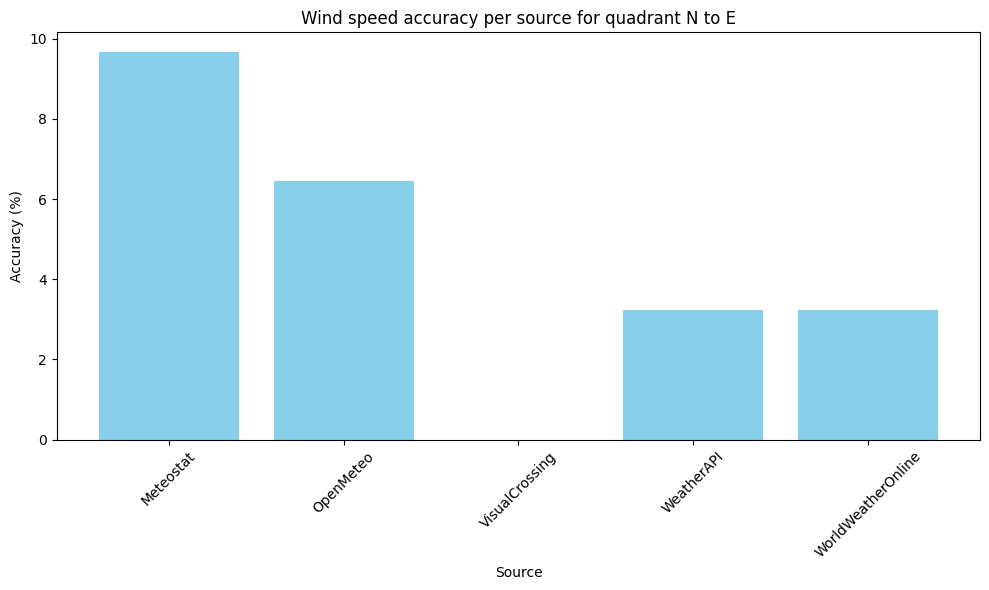

C:\Users\jelle\AppData\Local\Temp\ipykernel_39632\1279351615.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(quadrant_results["Source"], rotation=45)


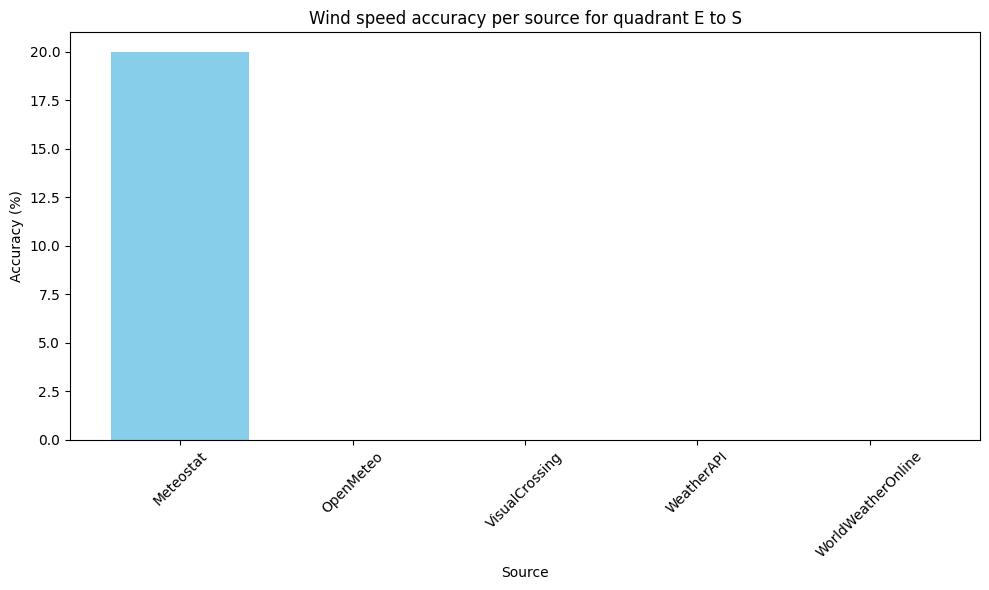

C:\Users\jelle\AppData\Local\Temp\ipykernel_39632\1279351615.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(quadrant_results["Source"], rotation=45)


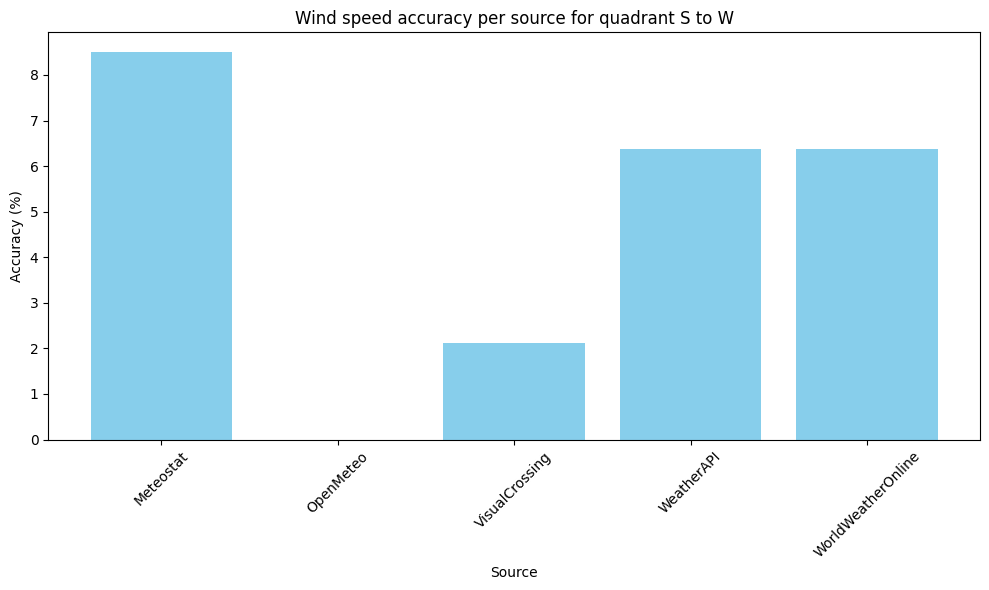

C:\Users\jelle\AppData\Local\Temp\ipykernel_39632\1279351615.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(quadrant_results["Source"], rotation=45)


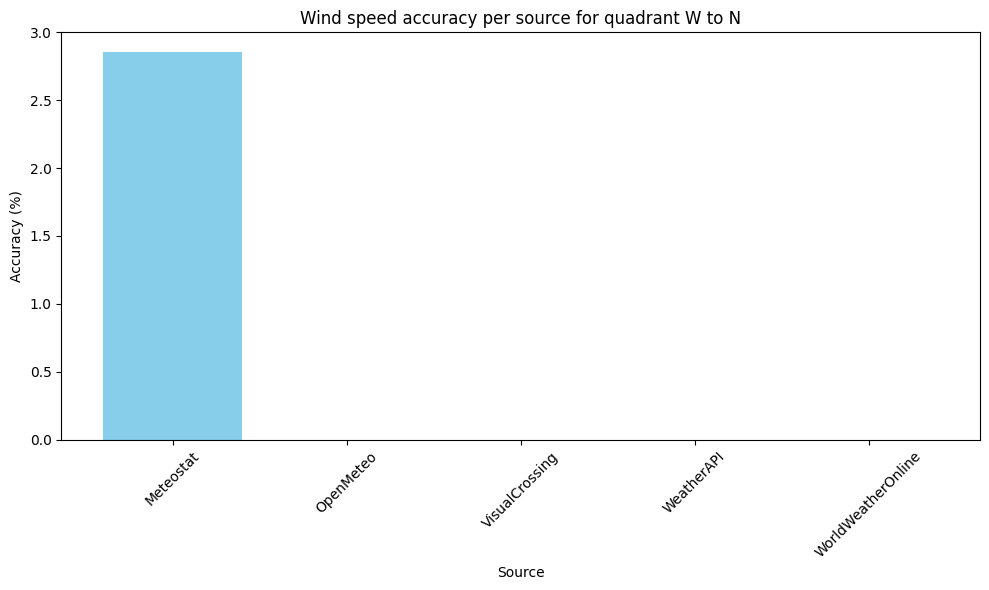

In [12]:
quadrants = {
    "N to E": ['N', 'NNE', 'NE', 'ENE', 'E'],
    "E to S": ['E', 'ESE', 'SE', 'SSE', 'S'],
    "S to W": ['S', 'SSW', 'SW', 'WSW', 'W'],
    "W to N": ['W', 'WNW', 'NW', 'NNW', 'N']
}

def evaluate_quadrant_speed_accuracy(df, msp_col, source_col, quadrant_directions, margin=1.0):
    subset = df[df["MSP Direction"].isin(quadrant_directions)]
    exact_matches = abs(subset[msp_col] - subset[source_col]) <= margin
    accuracy_rate = exact_matches.mean()*100
    return accuracy_rate
quadrant_speed_results = []


for name, df in sources_speed.items():

    merged_data = filtered_MSP[["time", "Wind speed (m/s)", "Wind direction 16point"]].rename(
        columns={
            "Wind speed (m/s)": "MSP Wind Speed",
            "Wind direction 16point": "MSP Direction"
        }
    )
    merged_data = merged_data.merge(
        df[["time", "Wind speed"]].rename(columns={"Wind speed": f"{name} Wind Speed"}),
        on="time",
        how="inner"
    )
    

    for quadrant, directions in quadrants.items():
        accuracy = evaluate_quadrant_speed_accuracy(
            merged_data, "MSP Wind Speed", f"{name} Wind Speed", directions
        )
        quadrant_speed_results.append({
            "Quadrant": quadrant,
            "Source": name,
            "Accuracy (%)": accuracy
        })


quadrant_speed_results_df = pd.DataFrame(quadrant_speed_results)

for quadrant, directions in quadrants.items():
    fig, ax = plt.subplots(figsize=(10, 6))
    quadrant_results = quadrant_speed_results_df[quadrant_speed_results_df["Quadrant"] == quadrant]
    

    ax.bar(
        quadrant_results["Source"], 
        quadrant_results["Accuracy (%)"], 
        color="skyblue"
    )
    
    ax.set_title(f"Wind speed accuracy per source for quadrant {quadrant}")
    ax.set_ylabel("Accuracy (%)")
    ax.set_xlabel("Source")
    ax.set_xticklabels(quadrant_results["Source"], rotation=45)

    plt.tight_layout()
    plt.show()


In [13]:
print(quadrant_speed_results_df)

   Quadrant              Source  Accuracy (%)
0    N to E           Meteostat      9.677419
1    E to S           Meteostat     20.000000
2    S to W           Meteostat      8.510638
3    W to N           Meteostat      2.857143
4    N to E           OpenMeteo      6.451613
5    E to S           OpenMeteo      0.000000
6    S to W           OpenMeteo      0.000000
7    W to N           OpenMeteo      0.000000
8    N to E      VisualCrossing      0.000000
9    E to S      VisualCrossing      0.000000
10   S to W      VisualCrossing      2.127660
11   W to N      VisualCrossing      0.000000
12   N to E          WeatherAPI      3.225806
13   E to S          WeatherAPI      0.000000
14   S to W          WeatherAPI      6.382979
15   W to N          WeatherAPI      0.000000
16   N to E  WorldWeatherOnline      3.225806
17   E to S  WorldWeatherOnline      0.000000
18   S to W  WorldWeatherOnline      6.382979
19   W to N  WorldWeatherOnline      0.000000


In [14]:
filtered_MSP

,time,Wind direction 16point,Wind speed,Wind speed (m/s)
0,2025-01-13 15:00:00,NaN,NaN,NaN
1,2025-01-13 16:00:00,ENE,0.0,0.0
2,2025-01-13 17:00:00,ENE,0.0,0.0
3,2025-01-13 18:00:00,ENE,0.0,0.0
4,2025-01-13 19:00:00,W,0.0,0.0
...,...,...,...,...
148,NaN,NaN,NaN,NaN
149,NaN,NaN,NaN,NaN
150,NaN,NaN,NaN,NaN
151,NaN,NaN,NaN,NaN


In [15]:
filter_meteostat = filtered_meteostat.dropna(subset=['time'])
filter_openmeteo = filtered_openmeteo.dropna(subset=['time'])
filter_visualcrossing = filtered_visualcrossing.dropna(subset=['time'])
filter_weatherapi = filtered_weatherAPI.dropna(subset=['time'])
filter_worldweatheronline = filtered_world_weather_online.dropna(subset=['time'])
filtered_MSP = filtered_MSP.dropna(subset=['time'])

In [16]:
def plot_windspeed_comparison():
    plt.figure(figsize=(20, 6))
    plt.plot(filtered_meteostat['time'], filtered_meteostat['Wind speed'], label='Meteostat (free)', marker='v', markersize=3, alpha=0.5)
    plt.plot(filtered_openmeteo['time'], filtered_openmeteo['Wind speed'], label='Open Meteo (free)', marker='v', markersize=3, alpha=0.5)
    plt.plot(filtered_visualcrossing['time'], filtered_visualcrossing['Wind speed'], label='Visual Crossing (free)', marker='v', markersize=3, alpha=0.5)
    plt.plot(filtered_weatherAPI['time'], filtered_weatherAPI['Wind speed'], label='Weather API (paid)', marker='s', markersize=3, alpha=0.5)
    plt.plot(filtered_world_weather_online['time'], filtered_world_weather_online['Wind speed'], label='World Weather Online (paid)', marker='s', markersize=3, alpha=0.5)
    plt.plot(filtered_MSP['time'], filtered_MSP['Wind speed (m/s)'], label='MSP', marker='o', markersize=4, color='black')
    legend = plt.legend(loc='best', shadow=True, fontsize='small')
    plt.title('Wind Speed Comparison (starting 13-01 15:00)')
    plt.ylabel('Wind Speed (m/s)')
    plt.xlabel('Time')
    plt.grid(True)
   
    plt.tight_layout()
    plt.show()


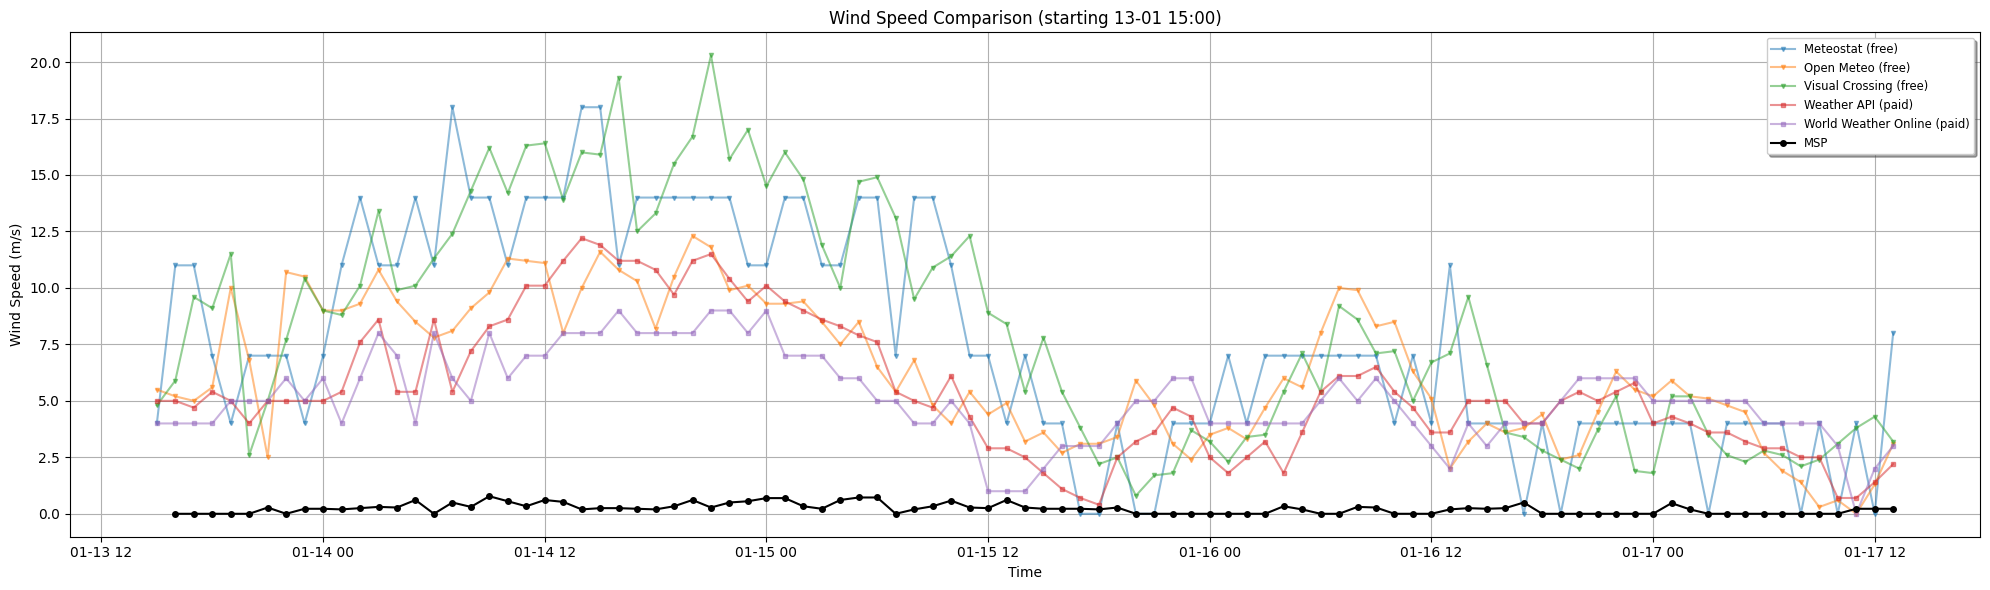

In [17]:
entries = 95 #until friday 15:00
filtered_meteostat = filtered_meteostat.iloc[:entries]
filtered_openmeteo = filtered_openmeteo.iloc[:entries]
filtered_visualcrossing = filtered_visualcrossing.iloc[:entries]
filtered_weatherAPI = filtered_weatherAPI.iloc[:entries]
filtered_world_weather_online = filtered_world_weather_online.iloc[:entries]
filtered_MSP = filtered_MSP.iloc[:entries]
    
plt.figure(figsize=(20, 6))
plt.plot(filtered_meteostat['time'], filtered_meteostat['Wind speed'], label='Meteostat (free)', marker='v', markersize=3, alpha=0.5)
plt.plot(filtered_openmeteo['time'], filtered_openmeteo['Wind speed'], label='Open Meteo (free)', marker='v', markersize=3, alpha=0.5)
plt.plot(filtered_visualcrossing['time'], filtered_visualcrossing['Wind speed'], label='Visual Crossing (free)', marker='v', markersize=3, alpha=0.5)
plt.plot(filtered_weatherAPI['time'], filtered_weatherAPI['Wind speed'], label='Weather API (paid)', marker='s', markersize=3, alpha=0.5)
plt.plot(filtered_world_weather_online['time'], filtered_world_weather_online['Wind speed'], label='World Weather Online (paid)', marker='s', markersize=3, alpha=0.5)
plt.plot(filtered_MSP['time'], filtered_MSP['Wind speed (m/s)'], label='MSP', marker='o', markersize=4, color='black')
    
legend = plt.legend(loc='best', shadow=True, fontsize='small')
plt.title('Wind Speed Comparison (starting 13-01 15:00)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Time')
plt.grid(True)
    
plt.tight_layout()
plt.show()


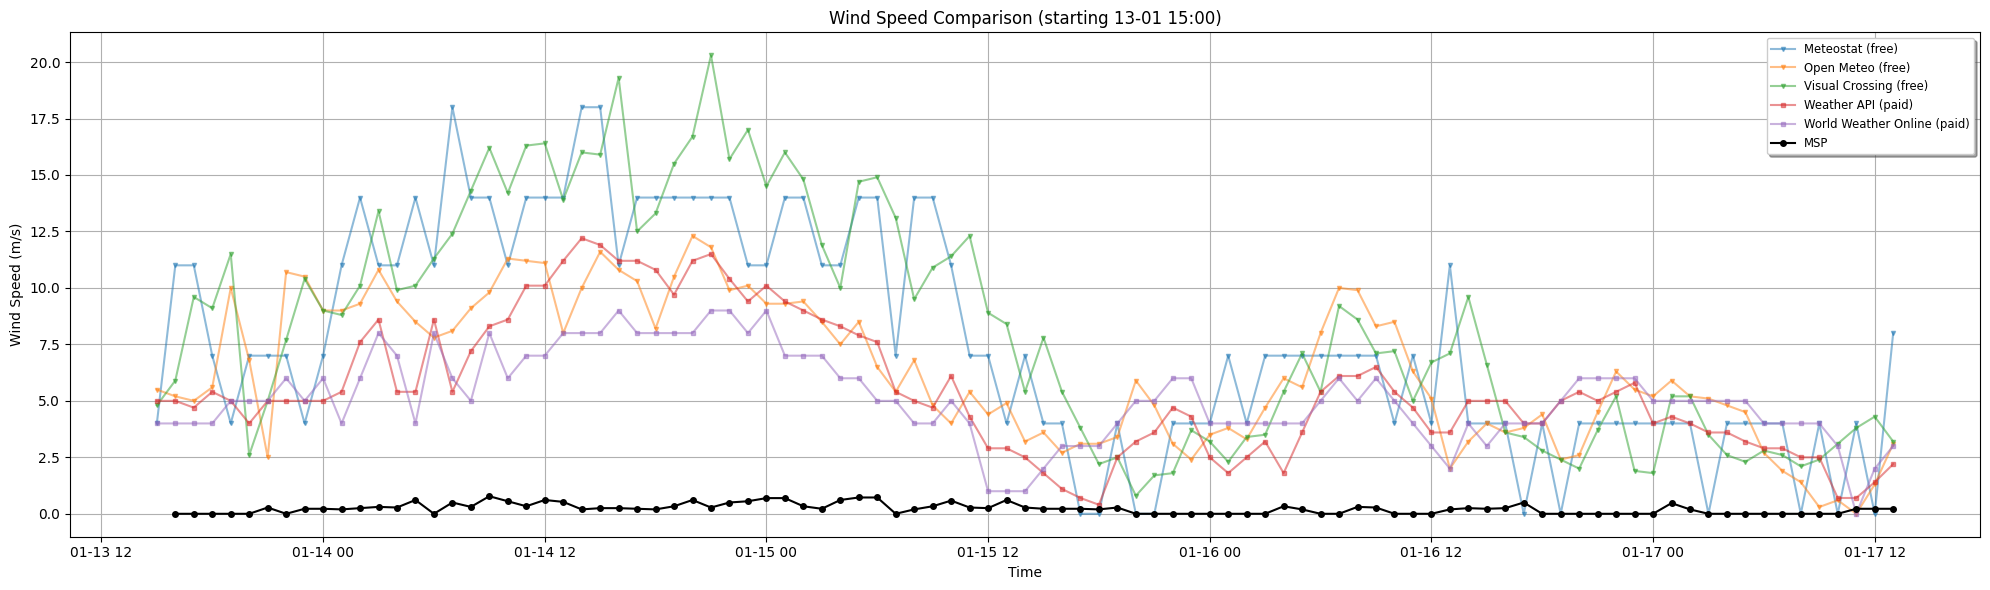

In [18]:
plot_windspeed_comparison()

In [20]:
import matplotlib.dates as mdates

def plot_windspeed_comparison():
    # Convert time columns to matplotlib's date format
    filtered_weatherAPI['time'] = mdates.date2num(filtered_weatherAPI['time'])
    filtered_world_weather_online['time'] = mdates.date2num(filtered_world_weather_online['time'])
    filtered_MSP['time'] = mdates.date2num(filtered_MSP['time'])
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_weatherAPI['time'], filtered_weatherAPI['Wind speed'], label='Weather API (paid)', marker='s', markersize=3, alpha=0.5)
    plt.plot(filtered_world_weather_online['time'], filtered_world_weather_online['Wind speed'], label='World Weather Online (paid)', marker='s', markersize=3, alpha=0.5)
    plt.plot(filtered_MSP['time'], filtered_MSP['Wind speed (m/s)'], label='MSP', marker='o', markersize=4, color='black')

    # Format x-axis for dates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Adjust intervals if needed
    plt.gcf().autofmt_xdate()  # Rotate and format x-axis labels
    
    legend = plt.legend(loc='best', shadow=True, fontsize='small')
    plt.title('Wind Speed Comparison (starting 13-01 15:00)')
    plt.xlabel('Time')
    plt.ylabel('Wind Speed (m/s)')
    plt.grid(True)
    plt.show()
